# Sentiment analysis using logistic regression

The **`sentiment`** data set consists of 3000 sentences which come from reviews on `imdb.com`, `amazon.com`, and `yelp.com`. Each sentence is labeled according to whether it comes from a positive review or negative review.

We will use <font color="magenta">logistic regression</font> to learn a classifier from this data.

Before starting on this notebook, download the data from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences. The folder `sentiment_labelled_sentences` (containing the data file `full_set.txt`) should be in the same directory as the notebook.

## 1. Set up notebook, load and preprocess data

First, some standard includes.

In [71]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

Now, we load in the data. Make sure the notebook is the same directory as the folder `sentiment_labelled_sentences`, and that the folder contains `full_set.txt`.

The data set consists of 3000 sentences, each labeled '1' (if it came from a positive review) or '0' (if it came from a negative review). To be consistent with our notation from lecture, we will change the negative review label to '-1'.

In [72]:
## Read in the data set.
with open("sentiment_labelled_sentences/full_set.txt") as f:
    content = f.readlines()
    
## Remove leading and trailing white space
content = [x.strip() for x in content]

## Separate the sentences from the labels
sentences = [x.split("\t")[0] for x in content]
labels = [x.split("\t")[1] for x in content]

## Transform the labels from '0 v.s. 1' to '-1 v.s. 1'
y = np.array(labels, dtype='int8')
y = 2*y - 1
#sentences

In [73]:
sentences[1]
x = sentences[1].replace('Good','Bad')
x

'Bad case, Excellent value.'

In [74]:
sentences[1][0]

'G'

In [75]:
i = 0
for x in sentences [0:10]:
    i = i+1
i

10

### Preprocessing the text data

To transform this prediction problem into one amenable to linear classification, we will first need to preprocess the text data. We will do four transformations:

1. Remove punctuation and numbers.
2. Transform all words to lower-case.
3. Remove _stop words_.
4. Convert the sentences into vectors, using a bag-of-words representation.

We begin with first two steps.

In [76]:
## full_remove takes a string x and a list of characters removal_list 
## returns x with all the characters in removal_list replaced by ' '
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

## Remove digits
digits = [str(x) for x in range(10)] #transfer digits to text
digit_less = [full_remove(x, digits) for x in sentences] # x is a sentence not a word

## Remove punctuation
punc_less = [full_remove(x, list(string.punctuation)) for x in digit_less]

## Make everything lower-case
sents_lower = [x.lower() for x in punc_less]
sents_lower

['so there is no way for me to plug it in here in the us unless i go by a converter ',
 'good case  excellent value ',
 'great for the jawbone ',
 'tied to charger for conversations lasting more than    minutes major problems  ',
 'the mic is great ',
 'i have to jiggle the plug to get it to line up right to get decent volume ',
 'if you have several dozen or several hundred contacts  then imagine the fun of sending each of them one by one ',
 'if you are razr owner   you must have this ',
 'needless to say  i wasted my money ',
 'what a waste of money and time  ',
 'and the sound quality is great ',
 'he was very impressed when going from the original battery to the extended battery ',
 'if the two were seperated by a mere    ft i started to notice excessive static and garbled sound from the headset ',
 'very good quality though',
 'the design is very odd  as the ear  clip  is not very comfortable at all ',
 'highly recommend for any one who has a blue tooth phone ',
 'i advise everyo

### Stop words

Stop words are words that are filtered out because they are believed to contain no useful information for the task at hand. These usually include articles such as 'a' and 'the', pronouns such as 'i' and 'they', and prepositions such 'to' and 'from'. We have put together a very small list of stop words, but these are by no means comprehensive. Feel free to use something different; for instance, larger lists can easily be found on the web.

In [77]:
## Define our stop words
stop_set = set(['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from'])

## Remove stop words
sents_split = [x.split() for x in sents_lower]
sents_processed = [" ".join(list(filter(lambda a: a not in stop_set, x))) for x in sents_split]
# why do we need to split the sents_lower
#.join is to coonect the items in list with ""
#filter(a,b),b is the list to be filter, a is the criteria
sents_split[2]
sents_processed [0:10]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time']

In [78]:
sents_split[2][1]

'for'

In [79]:
##### sents_lower[2]
# the difference between split and not split is that when doing "not in list"function, for the splited one the object is a word
# but for unsplited one is for the enteir string
#所以会strip掉单个字母而不是整个单词
#总而言之就是split后 每个list里的item不一样 对unsplit的是每个字母，对split的是每个单词

In [80]:
sents_lower[2][1]

'r'

In [81]:
i = 0
for x in sents_split [0:10]:
    i = i+1
    print x
i

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'i', 'go', 'by', 'a', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'for', 'the', 'jawbone']
['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', 'minutes', 'major', 'problems']
['the', 'mic', 'is', 'great']
['i', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume']
['if', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one']
['if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this']
['needless', 'to', 'say', 'i', 'wasted', 'my', 'money']
['what', 'a', 'waste', 'of', 'money', 'and', 'time']


10

What do the sentences look like so far?

In [82]:
sents_processed[0:10]

['so there is no way for me plug in here in us unless go by converter',
 'good case excellent value',
 'great for jawbone',
 'tied charger for conversations lasting more than minutes major problems',
 'mic is great',
 'have jiggle plug get line up right get decent volume',
 'if you have several dozen or several hundred contacts then imagine fun sending each them one by one',
 'if you are razr owner you must have this',
 'needless say wasted my money',
 'what waste money and time']

In [83]:
len(sents_processed)

3000

### Bag of words

In order to use linear classifiers on our data set, we need to transform our textual data into numeric data. The classical way to do this is known as the _bag of words_ representation. 

In this representation, each word is thought of as corresponding to a number in `{1, 2, ..., V}` where `V` is the size of our vocabulary. And each sentence is represented as a V-dimensional vector $x$, where $x_i$ is the number of times that word $i$ occurs in the sentence.

To do this transformation, we will make use of the `CountVectorizer` class in `scikit-learn`. We will cap the number of features at 4500, meaning a word will make it into our vocabulary only if it is one of the 4500 most common words in the corpus. This is often a useful step as it can weed out spelling mistakes and words which occur too infrequently to be useful.

Finally, we will also append a '1' to the end of each vector to allow our linear classifier to learn a bias term.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

## Transform to bag of words representation.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 4500)
data_features = vectorizer.fit_transform(sents_processed) #.fit_transform can calculate the frequency of the words in the word bag

## Append '1' to the end of each vector.
data_mat = data_features.toarray()

p_mat = data_features.toarray() # save data_mat in p_mat
data_mat = np.ones((p_mat.shape[0], p_mat.shape[1]+1))
data_mat[:,:-1] = p_mat #except for the last column, all columns equal p_mat
# p_mat here serves as a transit station
data_mat.shape
# 3000 sentences, and 4500 means we are searching the frequency of these 4500 words in 

(3000L, 4501L)

In [85]:
p_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
np.ones((p_mat.shape[0], p_mat.shape[1]+1))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [87]:
data_mat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [88]:
for i in data_mat[3]:
    if i != 0:
        print i

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [89]:
p_mat.shape[0]
p_mat.shape[1]+1
p_mat.shape

(3000L, 4500L)

### Training / test split

Finally, we split the data into a training set of 2500 sentences and a test set of 500 sentences (of which 250 are positive and 250 negative).

In [90]:
## Split the data into testing and training sets
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False), np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))

train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

('train data: ', (2500L, 4501L))
('test data: ', (500L, 4501L))


## 2. Fitting a logistic regression model to the training data

We could implement our own logistic regression solver using stochastic gradient descent, but fortunately, there is already one built into `scikit-learn`.

Due to the randomness in the SGD procedure, different runs can yield slightly different solutions (and thus different error values).

In [91]:
from sklearn.linear_model import SGDClassifier

## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none")
# y=w1*x1+w2*x2+w3*x3+....+w4500*x4500 x1 to x4500 are freqneucies of 4500 words , y=+/-1
clf.fit(train_data, train_labels)

## Pull out the parameters (w,b) of the logistic regression model
w = clf.coef_
b = clf.intercept_

## Get predictions on training and test data
preds_train = clf.predict(train_data)
preds_test = clf.predict(test_data)

## Compute errors
errs_train = np.sum((preds_train > 0.0) != (train_labels > 0.0))
errs_test = np.sum((preds_test > 0.0) != (test_labels > 0.0))

print "Training error: ", float(errs_train)/len(train_labels)
print "Test error: ", float(errs_test)/len(test_labels)

Training error:  0.0348
Test error:  0.194


In [92]:
clf.coef_.shape


(1L, 4501L)

## 3. Analyzing the margin

The logistic regression model produces not just classifications but also conditional probability estimates. 

We will say that `x` has **margin** `gamma` if (according to the logistic regression model) `Pr(y=1|x) > (1/2)+gamma` or `Pr(y=1|x) < (1/2)-gamma`. The following function **margin_counts** takes as input the classifier (`clf`, computed earlier), the test set (`test_data`), and a value of `gamma`, and computes how many points in the test set have margin at least `gamma`.

In [93]:
## Return number of test points for which Pr(y=1) lies in [0, 0.5 - gamma) or (0.5 + gamma, 1]
def margin_counts(clf, test_data, gamma):
    ## Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1] # possibility of label 1
    ## Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5-gamma)))[0]
    
    return float(len(margin_inds))

In [94]:
# yx
clf = SGDClassifier(loss="log", penalty="none")
clf.fit(train_data, train_labels)
preds = clf.predict_proba(test_data)
preds.shape
# each column of preds stands for the possibility of label for each data point

(500L, 2L)

We now visualize the test set's distribution of margin values.

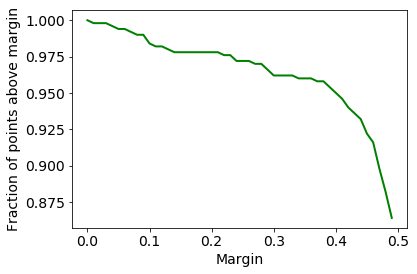

In [95]:
gammas = np.arange(0,0.5,0.01)
f = np.vectorize(lambda g: margin_counts(clf, test_data, g))
plt.plot(gammas, f(gammas)/500.0, linewidth=2, color='green')
plt.xlabel('Margin', fontsize=14)
plt.ylabel('Fraction of points above margin', fontsize=14)
plt.show()


Next, we investigate a natural question: <font color="magenta">Are points `x` with larger margin more likely to be classified correctly?</font>

To address this, we define a function **margin_errors** that computes the fraction of points with margin at least `gamma` that are misclassified.

In [96]:
## Return error of predictions that lie in intervals [0, 0.5 - gamma) and (0.5 + gamma, 1]
def margin_errors(clf, test_data, test_labels, gamma):
    ## Compute probability on each test point
    preds = clf.predict_proba(test_data)[:,1]
    
    ## Find data points for which prediction is at least gamma away from 0.5
    margin_inds = np.where((preds > (0.5+gamma)) | (preds < (0.5-gamma)))[0]
    
    ## Compute error on those data points.
    num_errors = np.sum((preds[margin_inds] > 0.5) != (test_labels[margin_inds] > 0.0))
    return float(num_errors)/len(margin_inds)

We now visualize the relationship between margin and error rate.

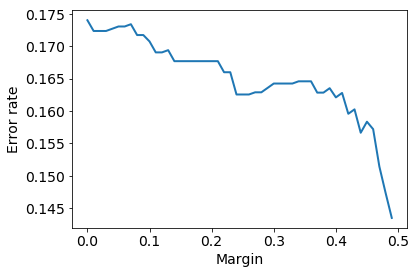

In [97]:
## Create grid of gamma values
gammas = np.arange(0, 0.5, 0.01)

## Compute margin_errors on test data for each value of g
f = np.vectorize(lambda g: margin_errors(clf, test_data, test_labels, g))

## Plot the result
plt.plot(gammas, f(gammas), linewidth=2)
plt.ylabel('Error rate', fontsize=14)
plt.xlabel('Margin', fontsize=14)
plt.show()

## 4. Words with large influence

Finally, we attempt to partially **interpret** the logistic regression model.

Which words are most important in deciding whether a sentence is positive? As a first approximation to this, we simply take the words whose coefficients in `w` have the largest positive values.

Likewise, we look at the words whose coefficients in `w` have the most negative values, and we think of these as influential in negative predictions.

In [130]:
# w is the coefficent vetor for the 4500 words
w.shape
w = np.delete(w,-1,axis=1)
w.shape

(1L, 4500L)

In [143]:
## Convert vocabulary into a list:
#vectorize.vocabulary is a dictionary ,and use sorted to sort it based on second row of the tuple
#np.array is to store z[0] in an array
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])])

## Get indices of sorting w
inds = np.argsort(w)

## Words with large negative values
neg_inds = inds[0][0:50]
print("Highly negative words: ")
print([str(i) for i in list(vocab[neg_inds])])

## Words with large positive values
pos_inds = inds[0][-49:-1]
print("Highly positive words: ")
print([str(x) for x in list(vocab[pos_inds])])

Highly negative words: 
['poor', 'worst', 'bad', 'rude', 'aren', 'disappointing', 'beep', 'unfortunately', 'bland', 'disappointment', 'then', 'wasn', 'failed', 'lacks', 'started', 'didn', 'crap', 'fly', 'fails', 'horror', 'mediocre', 'sucks', 'literally', 'return', 'avoid', 'same', 'joke', 'looks', 'waited', 'ripped', 'waste', 'not', 'terrible', 'break', 'cheap', 'talk', 'tasteless', 'doesn', 'make', 'junk', 'front', 'flavorless', 'torture', 'plot', 'imagine', 'none', 'off', 'establishment', 'odd', 'reason']
Highly positive words: 
['happy', 'friendly', 'plays', 'data', 'cult', 'happier', 'hand', 'vegas', 'ask', 'clear', 'angel', 'fast', 'fun', 'wonderful', 'sex', 'must', 'best', 'both', 'motorola', 'ray', 'charles', 'family', 'joy', 'loved', 'wow', 'delicious', 'incredible', 'cool', 'fall', 'fantastic', 'comfortable', 'scamp', 'art', 'easy', 'liked', 'amazing', 'love', 'beautiful', 'actually', 'great', 'awesome', 'funny', 'entertaining', 'works', 'nice', 'enjoyed', 'perfect', 'interes

In [ ]:
len(vectorizer.vocabulary_.items())
vectorizer.vocabulary_
vocab = np.array([z[0] for z in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])])

z[0]
vectorizer.get_feature_names()[4499]
#sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])

In [141]:
inds = np.argsort(w[0:4500])
inds

inds[0][0:5]


array([2770, 4449,  303, 3187,  205], dtype=int64)

## 5. Something for you to think about

Suppose you are building a classifier, and can tolerate an error rate of at most some value `e`. Unfortunately, every classifier you try has a higher error than this. 

Therefore, you decide that the classifier is allowed to occasionally **abstain**: that is, to say *"don't know"*. When it actually makes a prediction, it must have error rate at most `e`. And subject to this constraint, it should abstain as infrequently as possible.

How would you build an abstaining classifier of this kind, starting from a logistic regression model?